# Visualization/Analysis of Local GTFS-RT

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Process the Local Summarize_RDS Data

In [3]:
# Location for the local data
path = './transit_vis/data/to_upload'
filenames = os.listdir(path)

# Join all the data which is saved in different csv for each day
# all_data = pd.DataFrame()
# for filename in filenames:
#     daily_data = pd.read_csv(f"{path}/{filename}", dtype={'trip_short_name': str, 'route_short_name': str})
#     all_data = all_data.append(daily_data)
# all_data.to_csv(f"{path}/all_data.csv")

# If already processed, load the data here and comment out above
all_data = pd.read_csv(f"{path}/all_data.csv", dtype={'trip_short_name': str, 'route_short_name': str})
all_data.head()

,Unnamed: 0,tripid,vehicleid,lat,lon,orientation,scheduledeviation,prev_deviation,totaltripdistance,tripdistance,...,avg_speed_m_s,deviation_change_s,at_stop,route_id,trip_short_name,route_short_name,vis_id,length,lat_seg,lon_seg
0,0,46551167.0,8192,47.652122,-122.310783,357,-20,20.0,22754.611818,351.210308,...,7.0,-40.0,False,100146,LOCAL,255,2558,7892.0,-122.22789,47.635799
1,1,46551167.0,8192,47.650871,-122.304787,23,-51,-20.0,22754.611818,515.080829,...,15.0,-31.0,False,100146,LOCAL,255,2558,7892.0,-122.22789,47.635799
2,2,46551167.0,8192,47.650089,-122.304375,245,-68,-51.0,22754.611818,702.361424,...,6.0,-17.0,False,100146,LOCAL,255,2558,7892.0,-122.22789,47.635799
3,3,46551167.0,8192,47.650043,-122.304390,250,7,7.0,22754.611818,719.425214,...,5.0,0.0,True,100146,LOCAL,255,2558,7892.0,-122.22789,47.635799
4,4,46551167.0,8192,47.649364,-122.304565,266,33,7.0,22754.611818,787.680375,...,2.0,26.0,False,100146,LOCAL,255,2558,7892.0,-122.22789,47.635799


# Distributions of Key Characteristics/Metrics

In [4]:
# Metrics
# Speed mean/95th percentile = measure of overall transit performance
# Speed var = measure of how much transit performance varies across conditions
# Deviation mean = measure of how well transit delays are predicted by current practices (if low deviation, opportunity for sch padding)
# Deviation var = measure of unpredictability (chaos, stochastic delay) of transit delay

# Characteristics TODO
# Difference between locationtimes = update frequency
# Delay instances vs time of day to compare with survey

In [5]:
# Seaborn settings
sns.set_style('whitegrid')

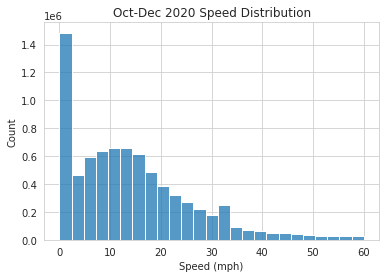

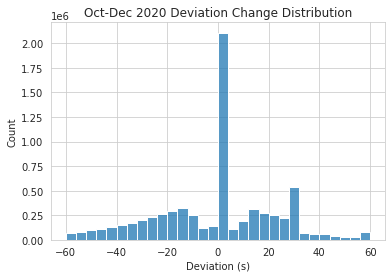

In [6]:
# Regular distributions of speed and deviation
speed_data = np.array(all_data['avg_speed_m_s']) * 2.237
sns.histplot(speed_data, binrange=(0, 60), bins=25).set(xlabel='Speed (mph)', title='Oct-Dec 2020 Speed Distribution')
plt.show()

dev_data = np.array(all_data['deviation_change_s'])
sns.histplot(dev_data, binrange=(-60,60), bins=30).set(xlabel='Deviation (s)', title='Oct-Dec 2020 Deviation Change Distribution')
plt.show()

# Superlatives

In [7]:
# Stops which cause the highest average delay
stop_data = all_data[all_data['at_stop'] == True]
stop_ranks = stop_data.groupby(['prev_stopid']).mean()
stop_ranks = stop_ranks.sort_values(['deviation_change_s'], ascending=False)
stop_ranks.head()
del stop_data

In [14]:
# Routes with lowest mean/95th percentile speed
route_ranks_95 = all_data.groupby(['route_id']).quantile(.95)[['avg_speed_m_s']]
route_ranks_avg = all_data.groupby(['route_id']).mean()[['avg_speed_m_s']]
route_ranks = pd.merge(route_ranks_95, route_ranks_avg, on='route_id')
route_ranks['performance'] = route_ranks['avg_speed_m_s_y'] / route_ranks['avg_speed_m_s_x']
route_ranks = route_ranks.sort_values(['performance'], ascending=True)
route_ranks.head()

,avg_speed_m_s_x,avg_speed_m_s_y,performance
route_id,,,
100006,18.0,8.004228,0.444679
100204,17.0,7.512168,0.441892
100203,18.0,7.768762,0.431598
100214,19.0,8.155102,0.429216
100269,18.0,7.652476,0.425138


In [16]:
# Most variable routes
route_ranks = all_data.groupby(['route_id']).var()
route_ranks = route_ranks.sort_values(['avg_speed_m_s'], ascending=False)[['avg_speed_m_s', 'deviation_change_s']]
route_ranks.head()

,avg_speed_m_s,deviation_change_s
route_id,,
100459,93.334133,5258.412590
100104,84.438717,4535.292205
100186,73.871850,5822.485803
100495,68.860093,2380.264182
102715,65.758327,2345.581501


In [10]:
# Segments with lowest mean/95th percentile speed
seg_ranks_95 = all_data.groupby(['compkey']).quantile(.95)[['avg_speed_m_s']]
seg_ranks_avg = all_data.groupby(['compkey']).mean()[['avg_speed_m_s']]
seg_ranks = pd.merge(seg_ranks_95, seg_ranks_avg, on='compkey')
seg_ranks['performance'] = route_ranks['avg_speed_m_s_y'] / route_ranks['avg_speed_m_s_x']
seg_ranks = seg_ranks.sort_values(['performance'], ascending=True)
seg_ranks.head()

NameError: name 'to_upload' is not defined

In [ ]:
# Most variable segments
seg_ranks = all_data.groupby(['compkey']).var()
seg_ranks = seg_ranks.sort_values(['avg_speed_m_s'], ascending=False)[['avg_speed_m_s', 'deviation_change_s']]
seg_ranks.head()

# Generate Data for Segment Heatmap

In [ ]:
# Generate segment compkey/speed/var for heatmap
seg_ranks.to_csv(f"{path}_segment_data_for_GIS.csv")